# Quick Start

This is a quick introduction to **pycyt** that you should be able to skim through in 5-10 minutes. Let's get started.

## Parsing FCS Files

First, let's get the file path to an FCS file. There is a sample one included in the package.

In [1]:
from pkg_resources import resource_filename
filepath = resource_filename('pycyt.examples.data', r'CD133+CD38- population in human Early Preterm Cord Blood.fcs')

Next we load the load the file into a `FlowFrame` object, which is a high-level container for flow data (not necessarily loaded from a file). All you need to do is pass in the path to the FCS file.

In [15]:
from pycyt import FlowFrame
sample = FlowFrame(filepath, comp='auto') # Automatically use spillover matrix for compensation if defined in file
print sample # Text representation shows text ID (default is file name), plus number of channels and events.

<FlowFrame 'CD133+CD38- population in human Early Preterm Cord Blood', 9x100000>


## FCS Metadata

Next we take a look at some of the basic descriptive properties:

In [3]:
print 'Path to FCS file:', sample.filepath
print 'Number of channels in file:', sample.par # Like "$PAR" FCS keyword
print 'Names of channels:', sample.channels
print 'Number of events:', sample.tot # Like "$TOT" FCS keyword
print 'Data dimensions:', sample.shape

Path to FCS file: c:\users\mjlum\documents\github\pycyt\pycyt\examples\data\CD133+CD38- population in human Early Preterm Cord Blood.fcs
Number of channels in file: 9
Names of channels: ['FSC-A', 'SSC-A', 'FITC-A', 'PE-A', 'PerCP-A', 'PE-Cy7-A', 'APC-A', 'APC-Cy7-A', 'Time']
Number of events: 100000
Data dimensions: (100000, 9)


We can get more information about the channels as a `pandas.DataFrame`, with values of all keywords defined in the FCS3.1 standard for each channel:

In [4]:
print sample.channel_info

        $PnN  $PnB        $PnE    $PnR  $PnD  $PnF  $PnG $PnL  $PnO  $PnP  \
1      FSC-A    32  (0.0, 0.0)  262144  None  None  1.00   []   NaN   NaN   
2      SSC-A    32  (0.0, 0.0)  262144  None  None  1.00   []   NaN   NaN   
3     FITC-A    32  (0.0, 0.0)  262144  None  None  1.00   []   NaN   NaN   
4       PE-A    32  (0.0, 0.0)  262144  None  None  1.00   []   NaN   NaN   
5    PerCP-A    32  (0.0, 0.0)  262144  None  None  1.00   []   NaN   NaN   
6   PE-Cy7-A    32  (0.0, 0.0)  262144  None  None  1.00   []   NaN   NaN   
7      APC-A    32  (0.0, 0.0)  262144  None  None  1.00   []   NaN   NaN   
8  APC-Cy7-A    32  (0.0, 0.0)  262144  None  None  1.00   []   NaN   NaN   
9       Time    32  (0.0, 0.0)  262144  None  None  0.01   []   NaN   NaN   

    $PnS  $PnT  $PnV  
1   None  None   250  
2   None  None   360  
3   CD31  None   500  
4  CD133  None   500  
5   CD38  None   600  
6   CD34  None   600  
7   CD71  None   550  
8   CD45  None   620  
9   None  None   NaN  

Finally, you can access the keyword values in the TEXT segment of the FCS file as a `dict` through the `text` property:

In [5]:
print sample.text.keys()[:10] # First 10 keywords
print 'TUBE NAME =', repr(sample.text['TUBE NAME'])

['SAMPLE ID', '$P7N', '$ETIM', '$P7E', '$P7G', 'P8DISPLAY', '$P7B', 'CYTNUM', '$P3R', 'P2DISPLAY']
TUBE NAME = 'CD133+/CD38-'


## FCS Data

But enough of all that, what about the data?

In [6]:
print sample.data[:20]

            FSC-A          SSC-A        FITC-A          PE-A        PerCP-A  \
0    76020.492188    4600.800293    933.961800    339.559318     886.642987   
1   181929.937500   25516.800781   3137.911998    836.107054    2521.798205   
2    94916.640625    9298.080078   1306.070314    112.727367   24595.763021   
3   115035.835938    8676.000000   7172.737864    136.335184    4363.203532   
4   122974.671875   14470.560547   7556.736892   5840.047143    2153.267213   
5   262143.000000  138097.453125  36508.467545  12617.717586  241789.772914   
6   262143.000000  126982.085938  20383.684384   6218.991313   18769.735299   
7    62094.761719    4399.200195    712.834911    213.199326     304.762370   
8    87564.750000   13203.360352   1283.166078    208.311645     544.054985   
9    58252.742188    7644.960449  15789.965506     44.937775     291.709395   
10   33973.941406   12297.600586   1305.039254    540.196594    1444.670838   
11  122814.515625    7290.720215   1353.175961    54

The data is loaded into a `pandas.DataFrame` and accessible through the `data` property. To get a quick summary we can call the `describe()` method on the `DataFrame` or, for convenience, on the `FlowFrame` itself:

In [7]:
print sample.describe()

               FSC-A          SSC-A         FITC-A           PE-A  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean   123709.128243   32200.360059    8214.170413    1906.163408   
std     76106.782435   55004.208483   21437.316436    8158.583639   
min      8793.330078  -15518.880859   -1517.297001   -2488.162521   
25%     66218.882812    7158.240234    1130.195536     187.731206   
50%     94705.976562   12517.920898    2342.752732     446.099938   
75%    169260.000000   27253.801270    6661.372880    1184.097290   
max    262143.000000  262143.000000  261995.450958  257960.705794   

             PerCP-A       PE-Cy7-A          APC-A      APC-Cy7-A  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean     7031.066677    3953.087272    5123.309035    5720.915337   
std     18981.140350   15199.282438   16609.616518   13371.305113   
min     -2297.433801   -5594.187914   -5767.057175   -3128.508197   
25%      1115.469913     429.9768

If you want the raw data as a simple `numpy.ndarray`, just use the `values` property (same as `FlowFrame.data.values`).

In [8]:
print sample.values

[[  7.60204922e+04   4.60080029e+03   9.33961800e+02 ...,   2.08923219e+04
    3.22536480e+02   0.00000000e+00]
 [  1.81929938e+05   2.55168008e+04   3.13791200e+03 ...,   2.61312620e+03
    1.75650394e+02   0.00000000e+00]
 [  9.49166406e+04   9.29808008e+03   1.30607031e+03 ...,  -3.75866174e+01
    1.93452246e+04   2.00000003e-01]
 ..., 
 [  8.22630938e+04   7.58880005e+02   1.04639083e+03 ...,   9.49269147e+02
    3.42482275e+01   1.93118008e+04]
 [  4.83555820e+04   1.72872012e+04   3.91032984e+02 ...,   1.21932792e+02
    5.98493710e+02   1.93118008e+04]
 [  5.67576133e+04   1.81425605e+04   1.62017019e+03 ...,   3.23709670e+02
    2.11497007e+03   1.93118008e+04]]


`FlowFrames` also support easy indexing:

    sample['FSC-A'] # Get one channel as a pandas.Series
    sample[[FSC-A', 'SSC-A']] # pandas.DataFrame with subset of channels as columns
    sample[50000:60000:10] # slice rows, return pandas.DataFrame
    sample[:10000, 'FSC-A'] # Index both rows and columns at the same time
    sample[:, [3, 4, 5]] # Get columns by index, R-style
    
All of these return built-in `pandas` types. To get the underlying `numpy.ndarray`, use the `values` property like

    sample['FSC-A'].values

## A quick note on table-like objects

**pycyt** functions typically operate on `FlowFrame` objects, but a goal is to to allow for the flexibility to use different package components individually. To this end most functions that take a `FlowFrame` instance as an argument also support a generic "table-like" object it its place and try to interpret it contextually.

For example, a `FlowFrame` can be considered a table with channels as columns and events as rows. A `pandas.DataFrame` is a table in the obvious way. A two-dimensional `numpy.ndarray` has rows on the first axis and (unnamed) columns on the second. Even a one-dimensional `numpy.ndarray` or `pandas.Series` can be considered a table with a single column.

So when you try to gate on an object, it first checks if it can be interpreted as a table with named columns. If it finds the gate channels in the column names it gates on those (in the correct order). If you pass it a table-like object with unnamed columns it assumes they correspond to the gate channels exactly. In either case, the object is returned in the same format filtered by rows which are contained within the gate.

## Plotting

It's hard to do flow analysis by just looking at a table of 1.4M numbers. **pycyt** supports easy plotting of one or two channels with transformations on one or both axes.

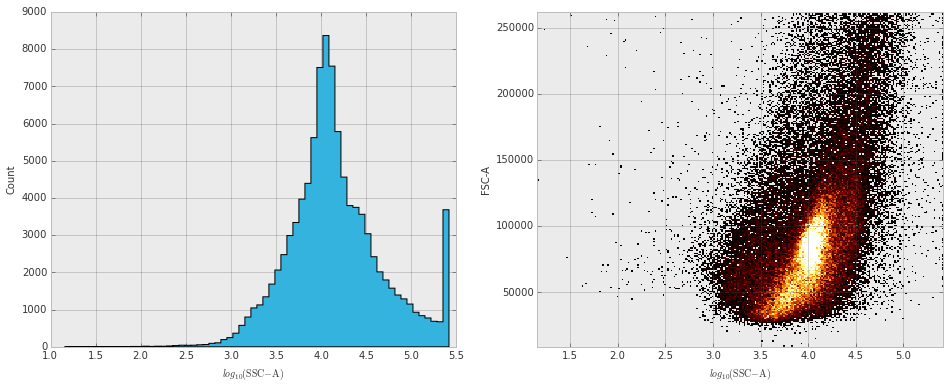

In [9]:
# Use matplotlib in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Import plotting funcs
from pycyt.plotting import hist, density2d, use_style
use_style() # Use custom matplotlib style

# Create subplots
figure = plt.figure(figsize=(16,6)) # big ol' plot
ax1, ax2 = figure.add_subplot(121), figure.add_subplot(122)

# Plot both ways
hist(sample, 'SSC-A', 'log', ax=ax1) # Histogram of SSC-A on log scale
density2d(sample[['SSC-A', 'FSC-A']], ['log', None], ax=ax2) # Density plot with log on X, no transform on Y

Both plotting functions support referencing a transformation by name, like `'log'` or `'asinh'`. This uses the default parameters for the transform, but you can pass your own parameters in as a `dict` or even pass in a transformation object. See the **plotting** and **transformations** example notebooks for more information.

Note how the channel name along with the transformation is pretty-printed in the axis label as well.

1d density plots and stacked histograms coming soon.

## Transformations

**pycyt** supports all of the standard Flow Cytometry transformations (specifically, those defined in the Gating-ML standard). These are implemented as classes in `pycyt.transforms`. All have one or more parameters. To use them simply call them as a function on a scalar, `numpy.ndarray` of any shape, or table-like object.

In [10]:
import numpy as np
from pycyt import transforms
# Hyperbolic arcsin transform, four positive decades with top of scale
# corresponding to maximum value of an 18-bit ADC on the detector
# (See values of $PnR FCS keywords)
asinh = transforms.AsinhTransform(t=2**18, pd=4)
print asinh

AsinhTransform(b=10, nd=0, t=262144, pd=4)


In [11]:
print asinh(500)
print asinh(np.linspace(-100, 10000, 6))
print asinh(sample[:10])

0.320404741336
[-0.15215679  0.46621056  0.54424388  0.58917868  0.62086691  0.64536576]
      FSC-A     SSC-A    FITC-A      PE-A   PerCP-A  PE-Cy7-A     APC-A  \
0  0.865598  0.561077  0.388033  0.278735  0.382397  0.352946  0.725362   
1  0.960341  0.747072  0.519533  0.376037  0.495804  0.406962  0.499666   
2  0.889701  0.637464  0.424400  0.163818  0.743080  0.545701 -0.072360   
3  0.910573  0.629946  0.609288  0.182825  0.555320 -0.389573 -0.163226   
4  0.917819  0.685487  0.614950  0.586971  0.478656  0.864554 -0.144137   
5  1.000000  0.930411  0.785963  0.670611  0.991225  0.984473  0.982455   
6  1.000000  0.921301  0.722686  0.593797  0.713730  0.632866  0.716019   
7  0.843629  0.556212  0.358759  0.229167  0.267150  0.387685  0.349267   
8  0.880947  0.675537  0.422481  0.226723  0.329527  0.366857  0.423826   
9  0.836694  0.616210  0.694961  0.084324  0.262469  0.266366  0.435780   

   APC-Cy7-A      Time  
0   0.273220  0.000000  
1   0.208869  0.000000  
2   0.7170

When transforming a table-like object, you can also drop rows in which one or more of the values are out of range of the transformation to avoid having `NaN` values.

In [12]:
log = transforms.LogTransform()

a = np.random.random((1000, 2)) * 2 - 1 # 1000 x 2 array of random values between -1 and 1
a_t = log(a, drop=True) # Drops all rows with non-positive values

print a.shape
print a_t.shape

(1000L, 2L)
(249L, 2L)


All the default transformations are registered to a specific short name and have default parameter values. This is how you can easily use them in plotting functions without needing to explicitly create them beforehand, for example.

In [13]:
print transforms.by_name('log')

LogTransform(b=10)


For maximum convenience, you can use the `transform` function to use different transformations on different columns of a table-like object, with the transforms being specified in a variety of ways. Transformation arguments for plotting functions are interpreted this way.

    transforms.transform(sample, 'asinh') # Hyperbolic arcsine transform on all columns
    transforms.transform(sample, ('asinh, dict(t=2**18, pd=4)) # Same, but override default parameters
    transforms.transform(sample, asinh) # Using the transformation object we created above
    
And then using different transformations on different columns, dropping rows with `NaN` values:

    transforms.transform(
        sample,
        ['PerCP-A', 'SSC-A', 'PE-A'],
        ['log', ('flin', dict(t=2**18, b=-100)), asinh],
        drop=True
        )

You can also explicitly test whether values are within the domain of a transform, or invert the transform as well.

## Gating

The most complex part of Flow analysis, but **pycyt** tries to make it as easy as possible. Let's make a rectangle gate on `FSC-A`/`SSC-A` and plot the gated data:

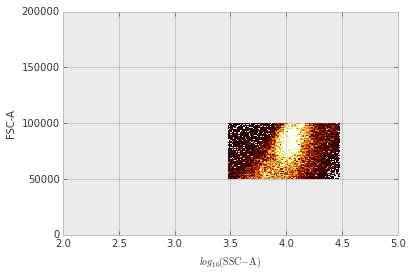

In [22]:
from pycyt.gates import RectangleGate

gate = RectangleGate(['FSC-A', 'SSC-A'], [(5e4, 1e5), (3e3, 3e4)]) # Just give ranges on each channel

gated = gate(sample) # Just use the gate like a function on the FlowFrame

density2d(gated[['SSC-A', 'FSC-A']], ['log', None], range=[[2, 5], [0, 2e5]])

Of course, you can also gate on any other table-like object. You can also simply get the gated event count or fraction , or even get an explicit array showing which rows fall into the gate. For more information, see the **gating** example notebook.